<a href="https://colab.research.google.com/github/Alka-bit/Open-CV/blob/main/Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic OpenCV

In [3]:
import cv2
import numpy as np
import argparse
from __future__ import print_function

In [4]:
from google.colab.patches import cv2_imshow

In [6]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = files.upload()

Saving Person1.jpg to Person1 (1).jpg


In [8]:
image = cv2.imread("Person1.jpg", 1) #reading the image, 1 for coloured and 0 for grayscale 

In [9]:
print(image)

[[[  6   6  12]
  [  6   6  12]
  [  6   6  12]
  ...
  [  9   5  16]
  [  9   5  16]
  [  8   4  15]]

 [[  6   6  12]
  [  6   6  12]
  [  6   6  12]
  ...
  [  9   5  16]
  [  7   6  16]
  [  9   5  16]]

 [[  6   6  12]
  [  6   6  12]
  [  6   6  12]
  ...
  [  7   6  16]
  [  5   6  16]
  [  7   6  16]]

 ...

 [[ 88 111 159]
  [ 86 109 157]
  [ 84 107 155]
  ...
  [ 25  14  16]
  [ 23  12  14]
  [ 26  13  15]]

 [[ 84 107 157]
  [ 81 104 154]
  [ 79 100 151]
  ...
  [ 24  13  15]
  [ 21  10  12]
  [ 24  11  13]]

 [[ 81 104 154]
  [ 77 100 150]
  [ 74  95 146]
  ...
  [ 24  13  15]
  [ 21  10  12]
  [ 24  11  13]]]


In [10]:
print(type(image))

<class 'numpy.ndarray'>


In [11]:
print(image.shape)  #resolution of the image "Rows * Columns * dimensions"

(222, 313, 3)


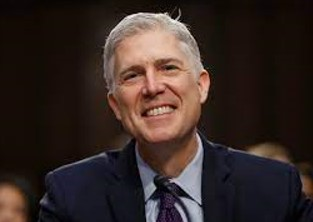

In [12]:
cv2_imshow(image)   #display the image
cv2.waitKey(2000)
cv2.destroyAllWindows()

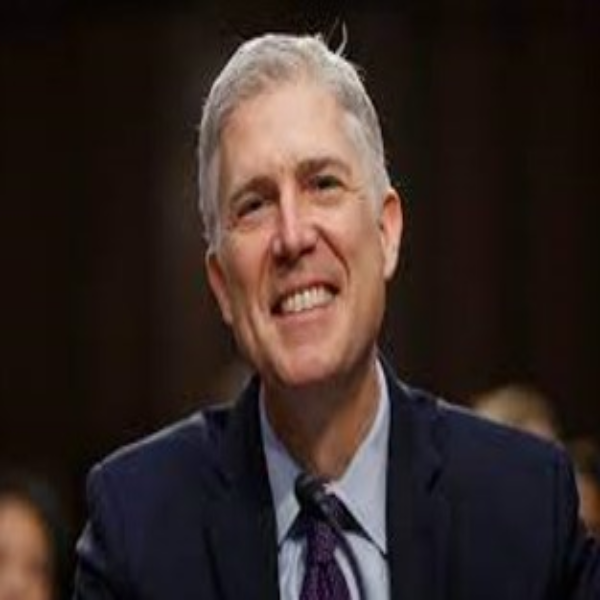

In [13]:
re_image = cv2.resize(image, (600, 600))   #resize the image
cv2_imshow(re_image)

In [14]:
print(re_image.shape)

(600, 600, 3)


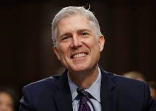

In [15]:
#making the resized image symmetrical 
resize_1 = cv2.resize(image, (int(image.shape[1]/2), int(image.shape[0]/2)))
cv2_imshow(resize_1)

In [16]:
print(resize_1.shape)

(111, 156, 3)


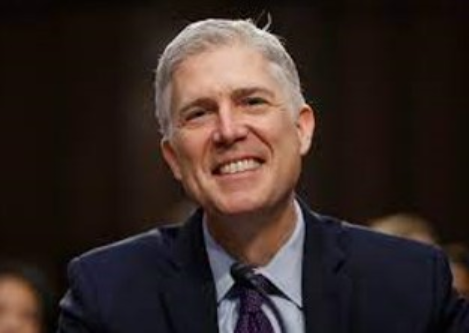

In [17]:
resize_2 = cv2.resize(image, (int(image.shape[1]*1.5), int(image.shape[0]*1.5)))
cv2_imshow(resize_2)

In [18]:
print(resize_2.shape)

(333, 469, 3)


Face detection

In [19]:
#create cascade 
face_c = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_c = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [20]:
gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_scale

array([[  8,   8,   8, ...,   9,   9,   8],
       [  8,   8,   8, ...,   9,   9,   9],
       [  8,   8,   8, ...,   9,   9,   9],
       ...,
       [123, 121, 119, ...,  16,  14,  15],
       [119, 116, 113, ...,  15,  12,  13],
       [116, 112, 108, ...,  15,  12,  13]], dtype=uint8)

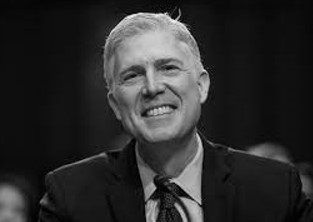

In [21]:
cv2_imshow(gray_scale)

In [22]:
print(gray_scale.shape)

(222, 313)


In [23]:
faces = face_c.detectMultiScale(image, scaleFactor= 1.05, minNeighbors=5)

In [24]:
print(faces)
print(type(faces))

[[ 99  25 110 110]]
<class 'numpy.ndarray'>


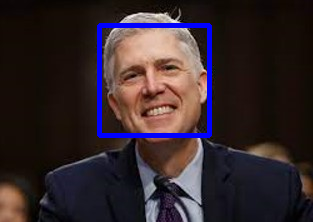

In [28]:
for (x, y, z, w) in faces:
  face_frame = cv2.rectangle(image, (x, y), (x+z, y+w), (255, 0, 0), 3)  #frame for face, rectangular
  faceROI = gray_scale[y:y+w,x:x+z]
cv2_imshow(image)